## User Engagement Analysis

In [2]:
import os
import sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [4]:
# Load the cleaned xdr data into a DataFrame
data = pd.read_csv('../Data/data/xdr_cleaned.csv', index_col=0)


In [5]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,4/25/2019 14:35,662.0,241983.25,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,8814393.0,36749741.0,308879636.0,1570185.0,2905912.0,3544322.25,18355943.0,17855187.0,2.924265e+08,180558843.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,4/25/2019 8:15,606.0,241983.25,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,15055145.0,53800391.0,653384965.0,1933278.0,4414096.0,937385.00,39359124.0,35565545.0,6.099208e+08,541959383.0
2,1.311448e+19,2019-04-09 17:42:00,49.0,4/25/2019 11:58,652.0,241983.25,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,4215763.0,27883638.0,279807335.0,1726277.0,10229119.0,3363124.00,34425237.0,23751202.0,2.304179e+08,414908351.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.311448e+19,2019-04-12 20:10:00,565.0,4/25/2019 10:40,947.0,241983.25,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,13910322.0,38542814.0,569138589.0,912788.0,7748843.0,2110349.00,34222253.0,18226068.5,5.312370e+08,564619822.0


In [6]:
from user_engagement_analysis import UserEngagementAnalysis
# Create an instance of the class
analysis = UserEngagementAnalysis(data)

# Define application traffic columns
applications = {
    'YouTube': ['Youtube DL (Bytes)', 'Youtube UL (Bytes)'],
    'Netflix': ['Netflix DL (Bytes)', 'Netflix UL (Bytes)'],
    'Gaming': ['Gaming DL (Bytes)', 'Gaming UL (Bytes)'],
    'Other': ['Other DL (Bytes)', 'Other UL (Bytes)']
}
# Initialize the analysis class
analysis = UserEngagementAnalysis(data)

# Aggregate metrics
analysis.aggregate_metrics()
analysis.metrics.head()

,MSISDN/Number,total_session_duration,total_download_traffic,total_upload_traffic,sessions_frequency
0,3.361370e+10,6.849414e+08,3.153241e+12,2.853935e+11,6946
1,3.361370e+10,5.264600e+04,7.300408e+08,8.586766e+07,2
2,3.361370e+10,1.312920e+05,7.455622e+07,5.645270e+07,1
3,3.361370e+10,2.419832e+05,4.891984e+08,3.382247e+07,1
4,3.361370e+10,5.268900e+04,1.145111e+09,7.409466e+07,2


In [7]:
# Report top customers
top_customers = analysis.report_top_customers()
print("Top 10 Customers by Sessions Frequency:", top_customers[0])
print("Top 10 Customers by Session Duration:", top_customers[1])
print("Top 10 Customers by Download Traffic:", top_customers[2])
print("Top 10 Customers by Upload Traffic:", top_customers[3])

Top 10 Customers by Sessions Frequency:        MSISDN/Number  total_session_duration  total_download_traffic  \
0       3.361370e+10            6.849414e+08            3.153241e+12   
89330   3.376819e+10            6.810001e+08            3.145834e+12   
7330    3.362632e+10            3.963598e+06            7.287455e+09   
710     3.361489e+10            3.856576e+06            8.091124e+09   
7011    3.362578e+10            4.088400e+06            7.724782e+09   
29278   3.365973e+10            3.461320e+06            7.092379e+09   
66074   3.367588e+10            3.300974e+06            7.308813e+09   
81535   3.376054e+10            3.362511e+06            7.851057e+09   
55614   3.366716e+10            3.076714e+06            5.087758e+09   
7767    3.362708e+10            2.751182e+06            5.309479e+09   

       total_upload_traffic  sessions_frequency  
0              2.853935e+11                6946  
89330          2.850879e+11                6945  
7330           6.

In [8]:
top_customers[0].reset_index()

,index,MSISDN/Number,total_session_duration,total_download_traffic,total_upload_traffic,sessions_frequency
0,0,3.361370e+10,6.849414e+08,3.153241e+12,2.853935e+11,6946
1,89330,3.376819e+10,6.810001e+08,3.145834e+12,2.850879e+11,6945
2,7330,3.362632e+10,3.963598e+06,7.287455e+09,6.707429e+08,18
3,710,3.361489e+10,3.856576e+06,8.091124e+09,6.967959e+08,17
4,7011,3.362578e+10,4.088400e+06,7.724782e+09,7.248050e+08,17
5,29278,3.365973e+10,3.461320e+06,7.092379e+09,6.178472e+08,16
6,66074,3.367588e+10,3.300974e+06,7.308813e+09,5.815688e+08,15
7,81535,3.376054e+10,3.362511e+06,7.851057e+09,7.023735e+08,15
8,55614,3.366716e+10,3.076714e+06,5.087758e+09,5.738326e+08,13
9,7767,3.362708e+10,2.751182e+06,5.309479e+09,4.454374e+08,12


In [9]:
# Normalize and cluster
analysis.normalize_and_cluster(n_clusters=3)
print(analysis.metrics.head())


   MSISDN/Number  total_session_duration  total_download_traffic  \
0   3.361370e+10            6.849414e+08            3.153241e+12   
1   3.361370e+10            5.264600e+04            7.300408e+08   
2   3.361370e+10            1.312920e+05            7.455622e+07   
3   3.361370e+10            2.419832e+05            4.891984e+08   
4   3.361370e+10            5.268900e+04            1.145111e+09   

   total_upload_traffic  sessions_frequency  cluster  
0          2.853935e+11                6946        1  
1          8.586766e+07                   2        0  
2          5.645270e+07                   1        0  
3          3.382247e+07                   1        0  
4          7.409466e+07                   2        0  


In [17]:
# Cluster summary
cluster_summary = analysis.cluster_summary()

cluster_summary

cluster sessions_frequency                           total_session_duration  \
                         min   max         mean    sum                    min   
0       0                  1     3     1.138755  85336                20262.0   
1       1               6945  6946  6945.500000  13891            681000095.0   
2       2                  2    18     2.795289  40227                40524.0   

                                           total_download_traffic  \
           max          mean           sum                    min   
0     375049.0  1.030823e+05  7.724785e+09           7.455622e+07   
1  684941449.0  6.829708e+08  1.365942e+09           3.145834e+12   
2    4088400.0  3.282801e+05  4.724279e+09           1.491124e+08   

                                            total_upload_traffic  \
            max          mean           sum                  min   
0  1.668658e+09  5.005106e+08  3.750726e+13         2.244628e+07   
1  3.153241e+12  3.149537e+12  6.299075e+12         2.850879e+11   
2  8.091124e+09  1.359322e+09  1.956200e+13         4.489257e+07   

                                             
            max          mean           sum  
0  1.216693e+08  4.655265e+07  3.488562e+12  
1  2.853935e+11  2.852407e+11  5.704814e+11  
2  7.248050e+08  1.163636e+08  1.674589e+12

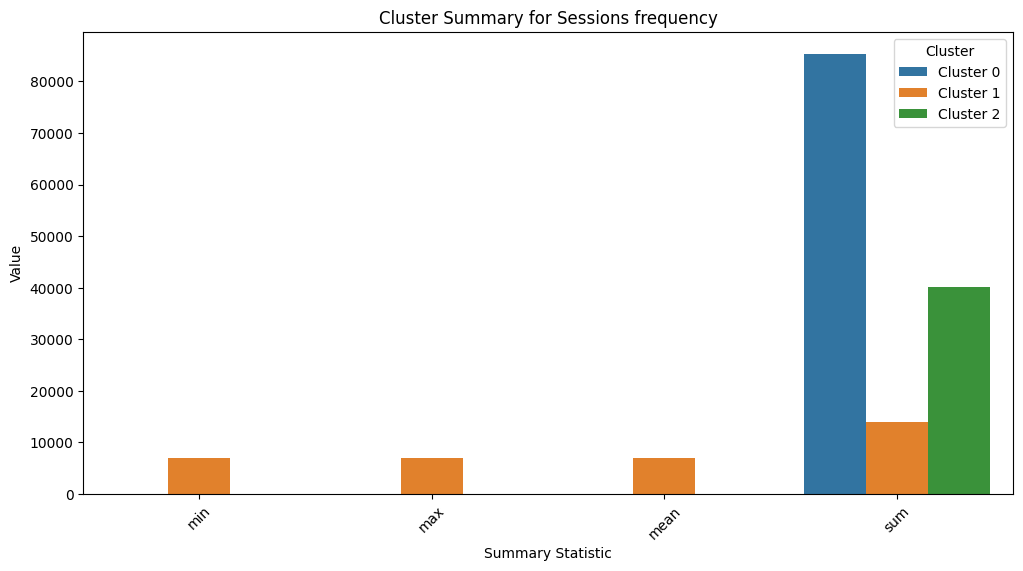

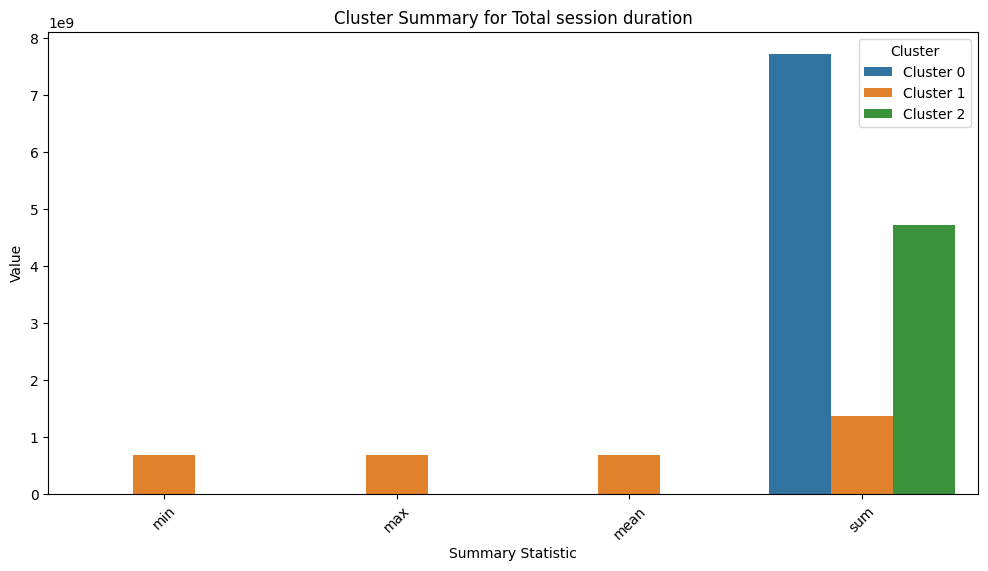

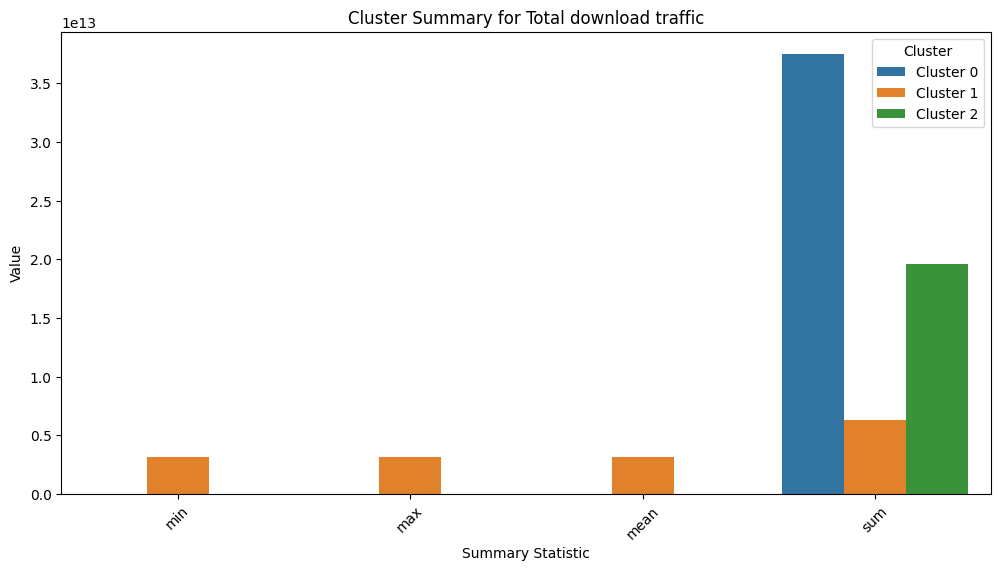

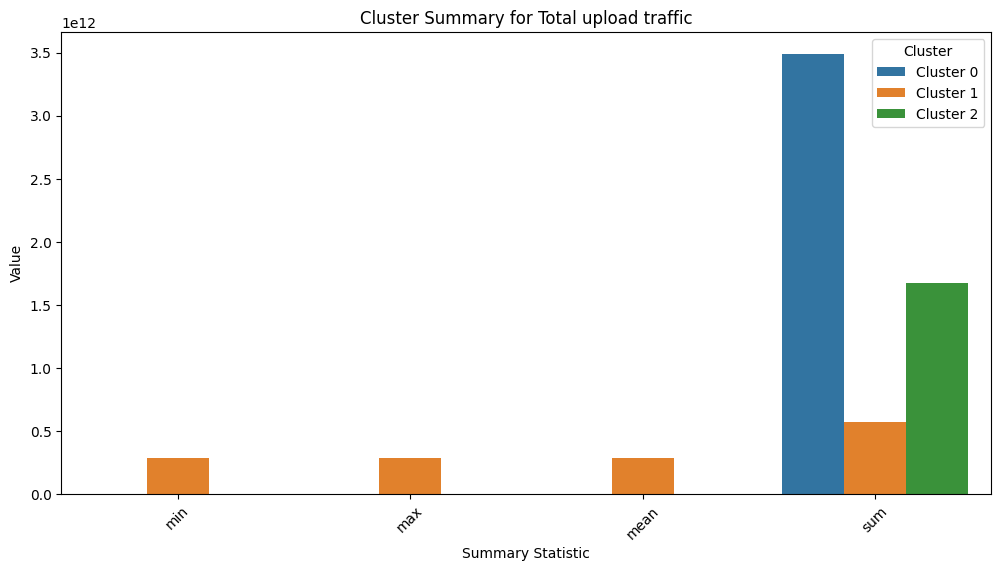

In [68]:
# Visualizing each metric separately
metrics = ['sessions_frequency', 'total_session_duration', 'total_download_traffic', 'total_upload_traffic']
summary_stats = ['min', 'max', 'mean', 'sum']
# Iterate through each metric

for metric in metrics:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Select rows corresponding to the current metric and transpose
    met = cluster_summary[metric].T.reset_index()
    met.columns = ['Summary Statistic', 'Cluster 0', 'Cluster 1', 'Cluster 2']
    
    # Debug: Print the DataFrame to check its content
    # print(f"Data for {metric}:")
    # print(met)
    
    # Melt DataFrame to long format for seaborn
    met_long = met.melt(id_vars='Summary Statistic', var_name='Cluster', value_name='Value')
    
    # # Debug: Print the melted DataFrame to check its content
    # print(f"Melted Data for {metric}:")
    # print(met_long)
    
    # Plot using seaborn
    sn.barplot(x='Summary Statistic', y='Value', hue='Cluster', data=met_long, ax=ax)
    
    ax.set_title(f'Cluster Summary for {metric.replace("_", " ").capitalize()}')
    ax.set_xlabel('Summary Statistic')
    ax.set_ylabel('Value')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    

In [ ]:
# Aggregate traffic per application
app_total_traffic, top_10_engaged_per_app = analysis.aggregate_traffic_per_application(applications=applications)
print("Total Traffic per Application:", app_total_traffic)
print("Top 10 Engaged Users per Application:", top_10_engaged_per_app)



Total Traffic per Application:   application  download_bytes  upload_bytes   total_bytes
0      Gaming    6.261886e+13  1.229855e+12  6.384872e+13
1     Netflix    1.724772e+12  1.632068e+12  3.356840e+12
2       Other    6.247781e+13  1.225735e+12  6.370355e+13
3     YouTube    1.725886e+12  1.633035e+12  3.358921e+12
Top 10 Engaged Users per Application:           MSISDN  download_bytes  upload_bytes application   total_bytes
0   3.361370e+10    3.122603e+12  6.101169e+10      Gaming  3.183615e+12
1   3.376819e+10    3.121426e+12  6.152340e+10      Gaming  3.182950e+12
2   3.361489e+10    7.573008e+09  1.272493e+08      Gaming  7.700257e+09
3   3.376054e+10    7.350510e+09  1.441438e+08      Gaming  7.494654e+09
4   3.362578e+10    7.144608e+09  1.533882e+08      Gaming  7.297996e+09
5   3.367588e+10    6.863307e+09  1.074453e+08      Gaming  6.970752e+09
6   3.362632e+10    6.726535e+09  1.423192e+08      Gaming  6.868855e+09
7   3.365973e+10    6.611019e+09  1.157518e+08      Gamin

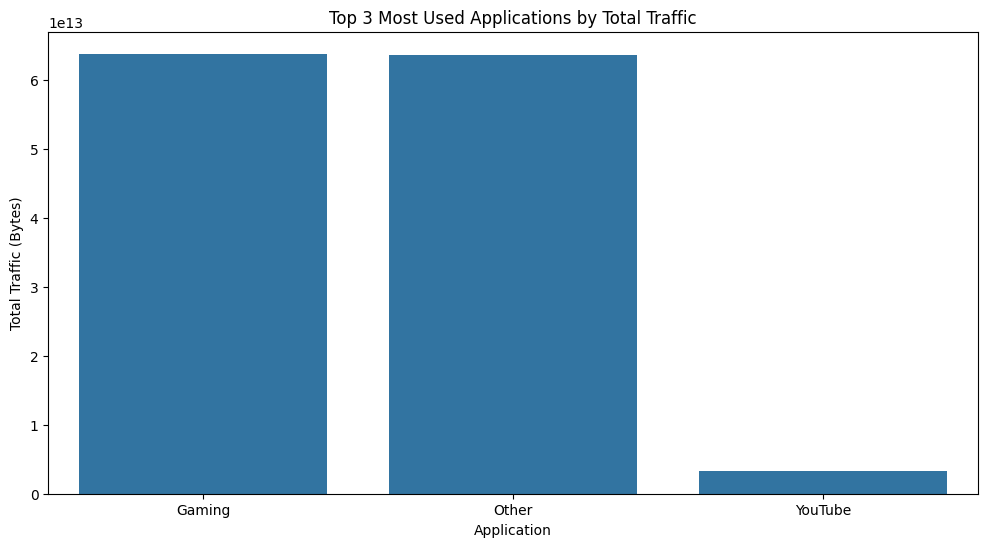

In [ ]:
# Plot top applications 
top_3_apps = app_total_traffic.nlargest(3, 'total_bytes')
analysis.plot_top_applications(top_3_apps)


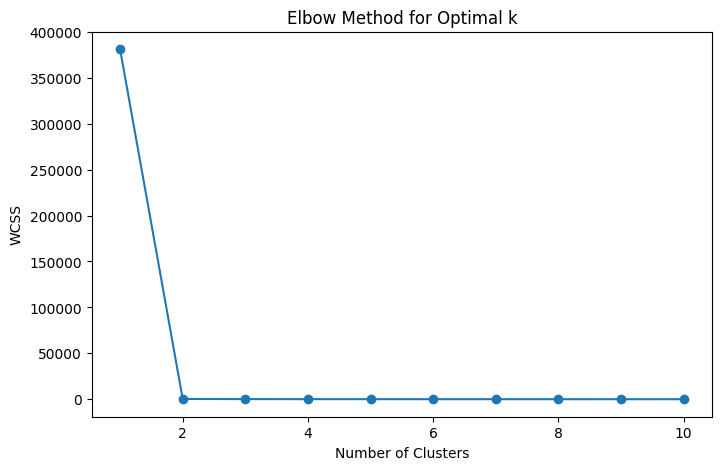

In [ ]:
# Elbow method for determining optimal number of clusters
analysis.elbow_method()